In [1]:
import sys
sys.path.append('/home/zhangjianquan/anaconda3/lib/python3.7/site-packages/')

In [2]:
sys.path.append('./module/')
import pandas as pd 
import numpy as np 

In [3]:
from predict_hand import predict_hand
from predict_qualified import predict_qualified
from predict_encoding import predict_encoding
from predict_feature import predict_feature
from predict_model import predict_model
from predict_prediction import predict_prediction 
from predict_analysis import predict_analysis

In [4]:
input_path = '../../../Data/Price_System/Price_Predict/raw/house/used_house_data_test.csv'
output_path = '../../../Data/Price_System/Price_Predict/intermediate/used_house_data_test_intermediate.csv'
data_hand, cols = predict_hand(input_path=input_path, 
                               output_path=output_path)
data_hand

,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Year_Of_Housing,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,107100261662,浦东,三林,城林雅苑,1室1厅,2018-09-30,218.0,46502.0,235.0,149.0,...,动迁安置房,2018-05-05,普通住宅,非共有,NaN,28.0,1.0,6.0,1.0,1.0
1,107100668755,浦东,源深,盛世年华,3室2厅,2018-09-30,1620.0,107613.0,1680.0,8.0,...,商品房,2018-09-23,普通住宅,共有,NaN,32.0,2.0,2.0,3.0,2.0
2,107100566972,浦东,世博,雪野二村,2室1厅,2018-09-30,368.0,62089.0,380.0,43.0,...,商品房,2018-08-19,普通住宅,非共有,NaN,6.0,1.0,4.0,2.0,1.0
3,107100390003,浦东,周浦,印象春城,2室2厅,2018-09-30,368.0,41242.0,388.0,105.0,...,商品房,2018-06-18,普通住宅,NaN,NaN,18.0,2.0,4.0,2.0,2.0
4,107100382965,浦东,康桥,双秀西园,2室2厅,2018-09-30,289.0,36125.0,310.0,108.0,...,动迁安置房,2018-06-15,普通住宅,共有,NaN,11.0,1.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,107002207043,闵行,颛桥,兴银花园,2室1厅,2018-09-28,220.0,33228.0,240.0,354.0,...,商品房,2017-10-10,普通住宅,共有,NaN,6.0,1.0,2.0,2.0,1.0
96,107100485933,闵行,七宝,东方花园三期,3室2厅,2018-09-28,878.0,66516.0,900.0,69.0,...,商品房,2018-07-22,普通住宅,非共有,NaN,18.0,2.0,4.0,3.0,2.0
97,107100544415,闵行,老闵行,万科公园大道,2室2厅,2018-09-28,371.0,47989.0,360.0,48.0,...,商品房,2018-08-12,普通住宅,非共有,NaN,28.0,1.0,2.0,2.0,2.0
98,107100488853,闵行,七宝,万科城花新园,3室2厅,2018-09-28,850.0,65521.0,850.0,68.0,...,商品房,2018-07-23,普通住宅,共有,NaN,11.0,1.0,2.0,3.0,2.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from c

Glyph 35199 missing from current font.
Glyph 29677 missing from current font.
Glyph 29273 missing from current font.
Glyph 21517 missing from current font.
Glyph 32858 missing from current font.
Glyph 32536 missing from current font.
Glyph 21335 missing from current font.
Glyph 24237 missing from current font.
Glyph 21830 missing from current font.
Glyph 21697 missing from current font.
Glyph 25151 missing from current font.
Glyph 21160 missing from current font.
Glyph 36801 missing from current font.
Glyph 32622 missing from current font.
Glyph 21806 missing from current font.
Glyph 21518 missing from current font.
Glyph 19996 missing from current font.
Glyph 38389 missing from current font.
Glyph 34892 missing from current font.
Glyph 32769 missing from current font.
Glyph 24029 missing from current font.
Glyph 27801 missing from current font.
Glyph 27743 missing from current font.
Glyph 19990 missing from current font.
Glyph 21338 missing from current font.
Glyph 23453 missing from 

数据去重开始
去重后数据规格：(100, 35)
数据去重结束
去除了缺失率超过40 % 的特征:
Property_Rights_Time
Year_Of_Housing
数值型数据EM插补开始,总数据量：100
数值型数据EM插补完成，耗时0秒
非数值型数据EM插补开始,总数据量：100
分类变量预编码完成，开始数据插值
分类变量插值与反编码完成，共耗时0秒
异常检测开始


All-NaN slice encountered
All-NaN slice encountered

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

Iteration num: 4
=========异常点作图========


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.
Glyph 32570 missing from current font.
Glyph 22833 missing from current font.
Glyph 29575 missing from current font.
Glyph 24773 missing from current font.
Glyph 20917 missing from current font.
Glyph 32479 missing from current font.
Glyph 35745 missing from current font.


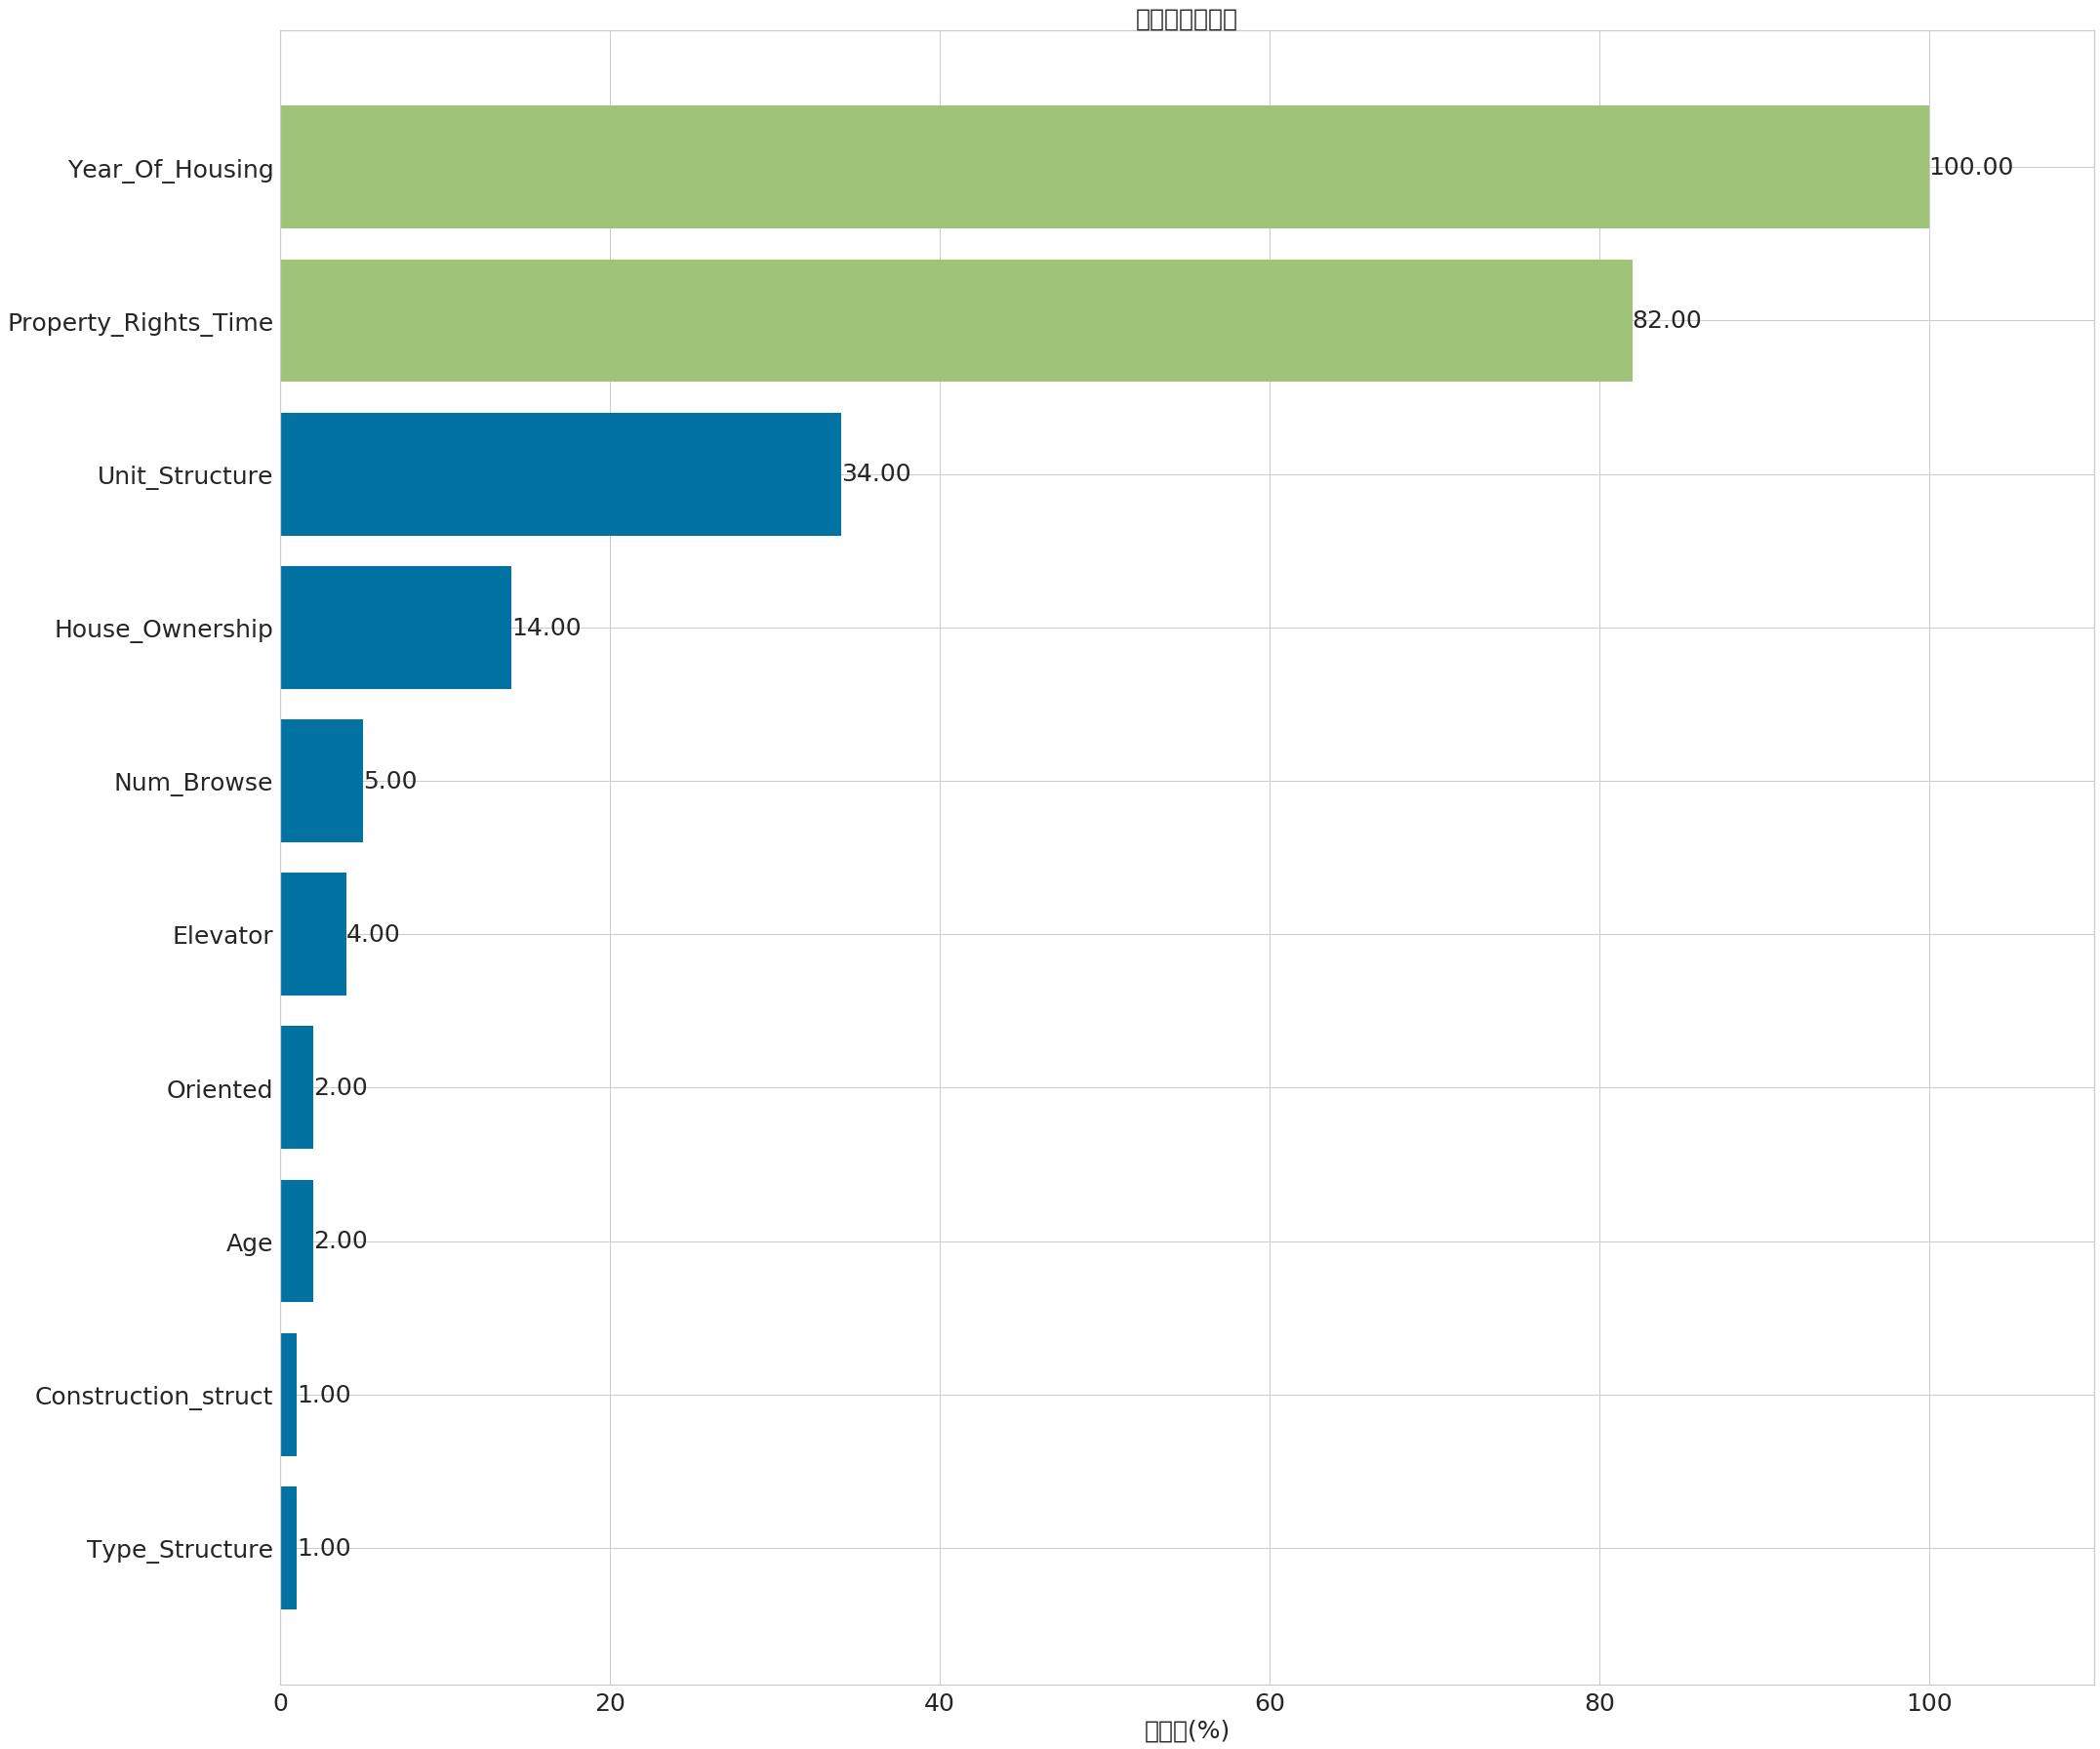

Glyph 29305 missing from current font.
Glyph 24449 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 20540 missing from current font.
Glyph 20010 missing from current font.
Glyph 25968 missing from current font.
Glyph 29305 missing from current font.
Glyph 24449 missing from current font.


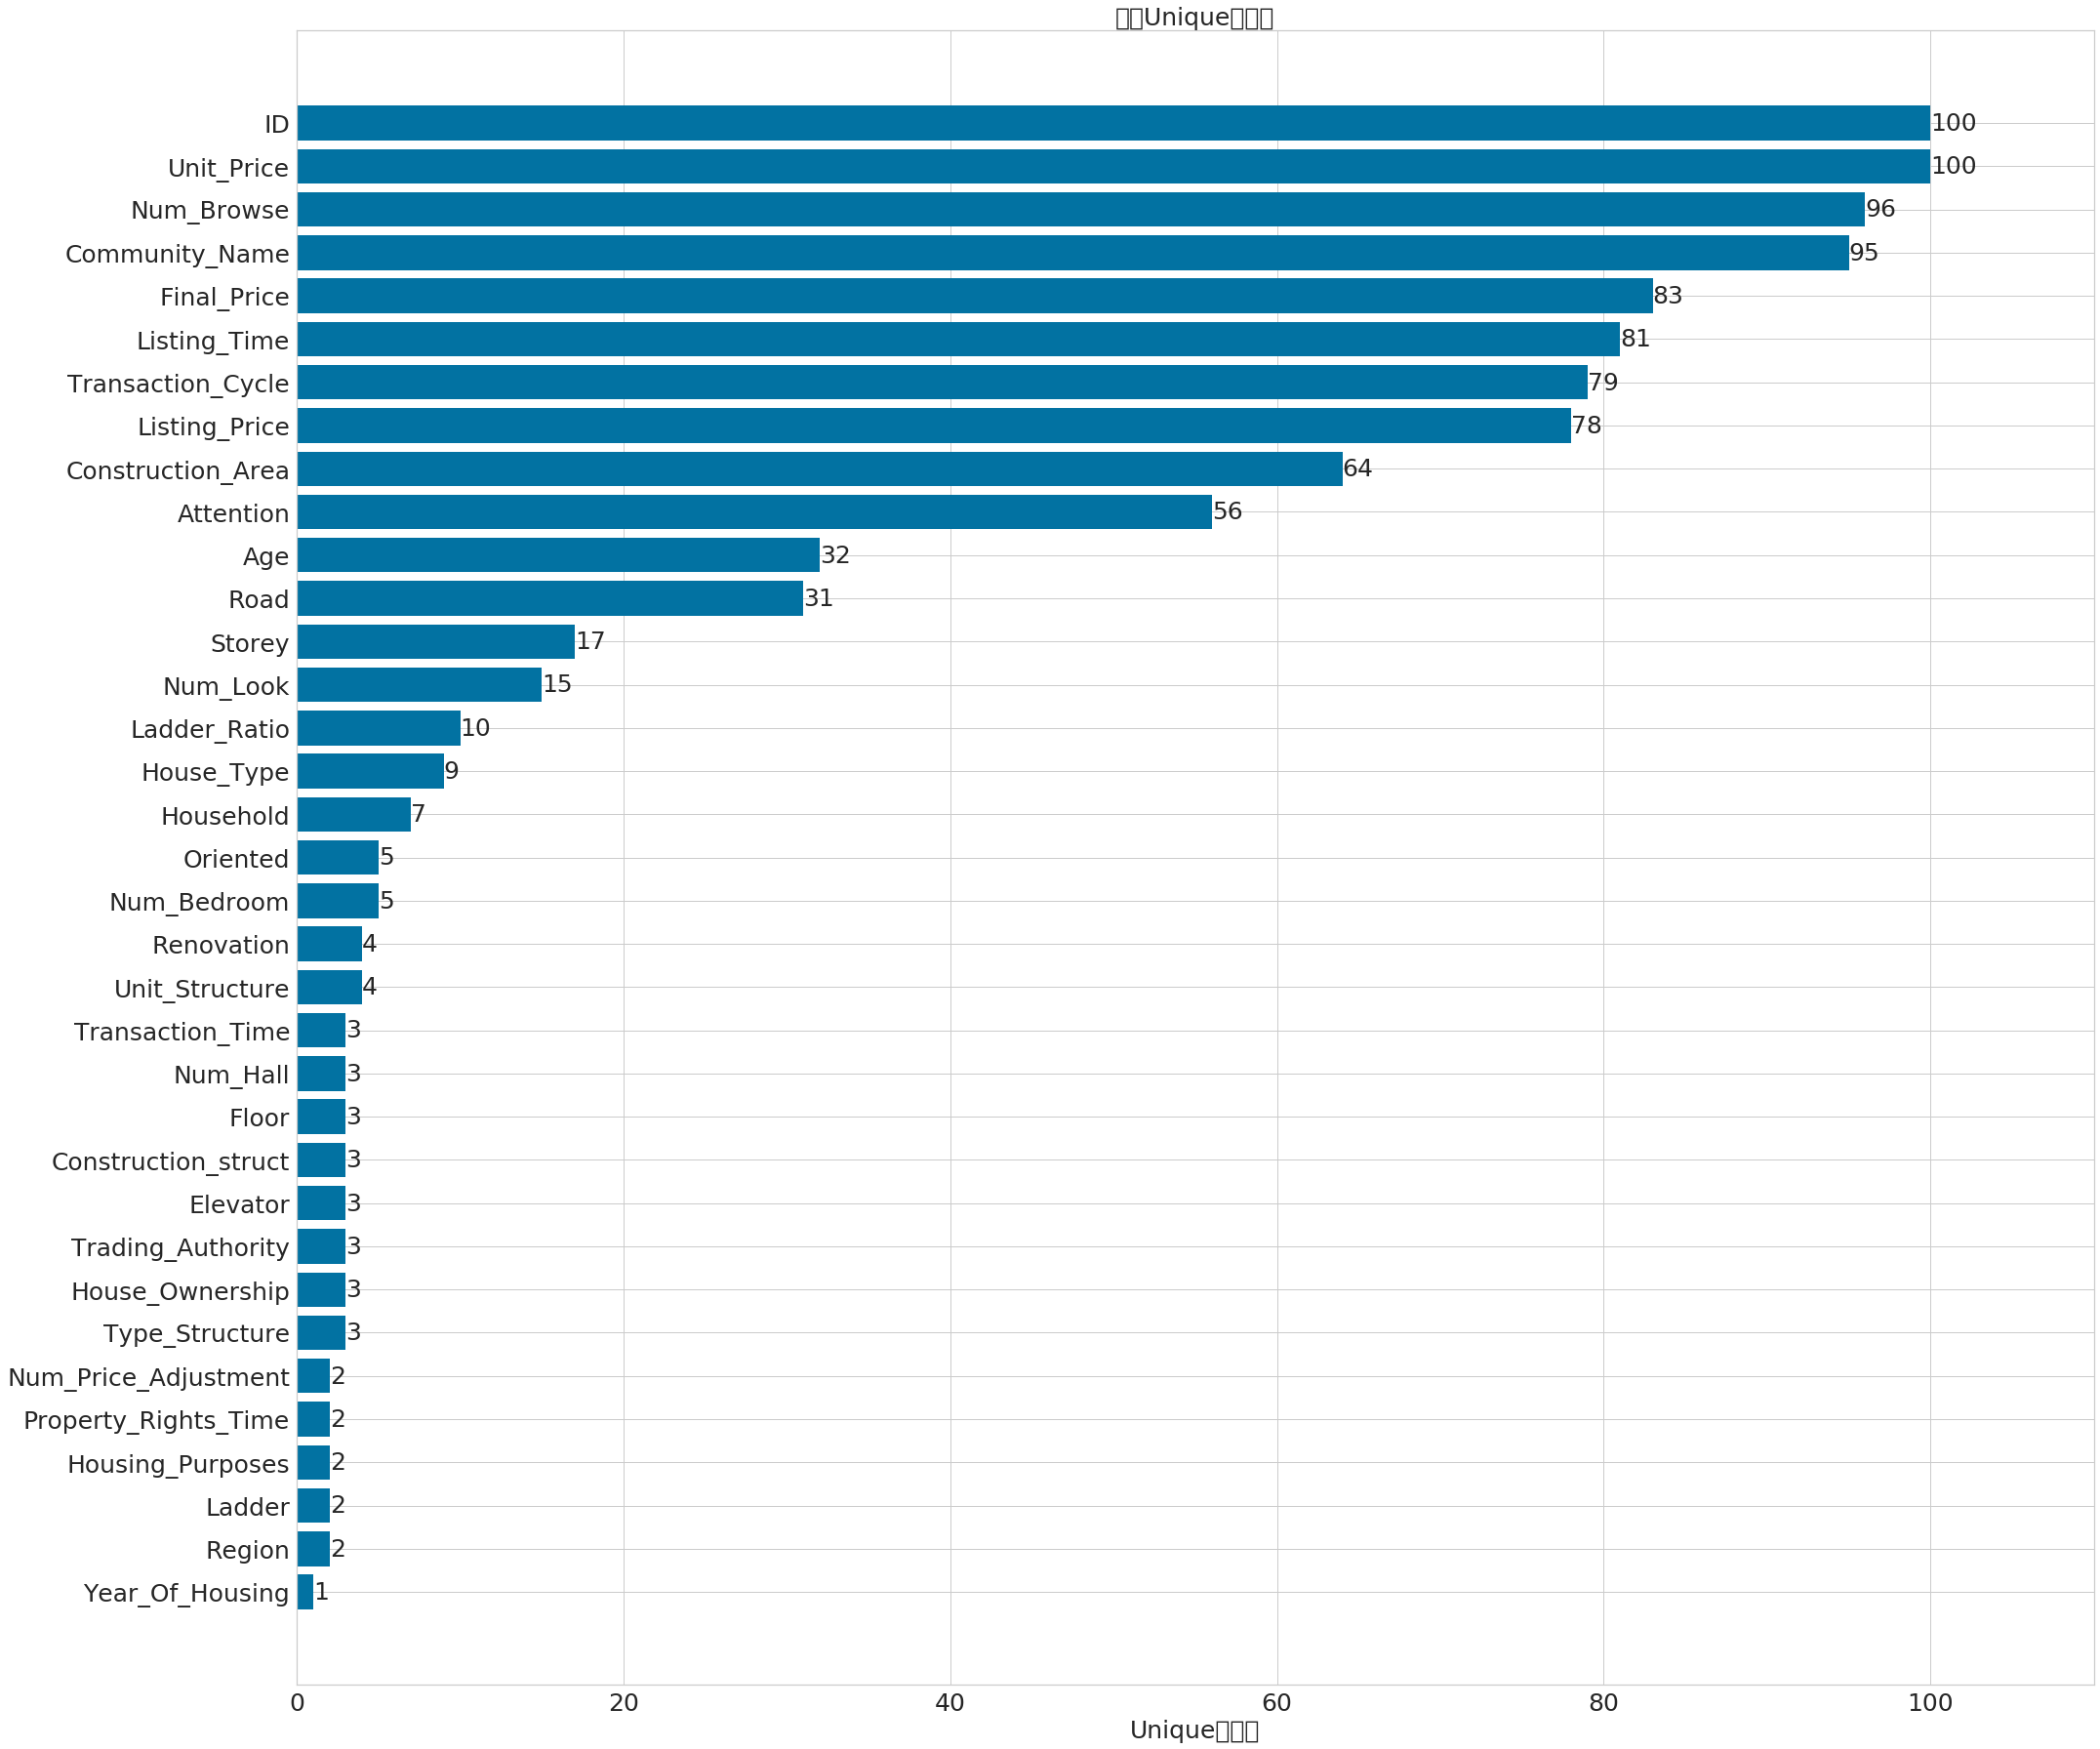

Glyph 25454 missing from current font.
Glyph 20998 missing from current font.
Glyph 24067 missing from current font.
Glyph 21462 missing from current font.
Glyph 21462 missing from current font.
Glyph 25454 missing from current font.
Glyph 20998 missing from current font.
Glyph 24067 missing from current font.


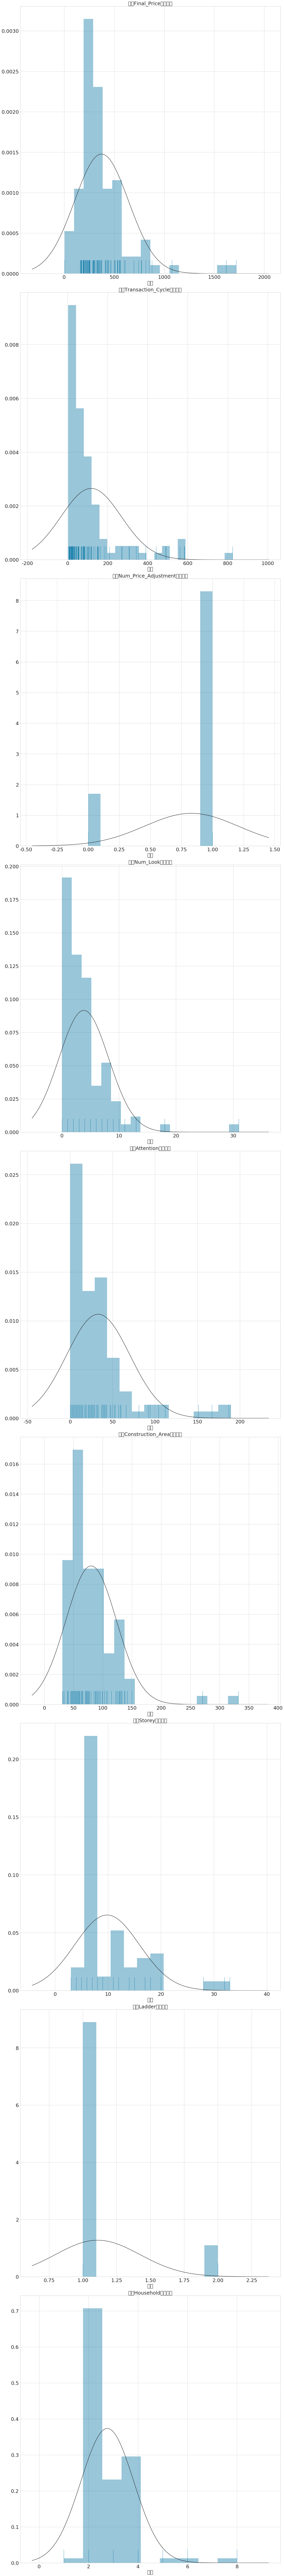

Glyph 20027 missing from current font.
Glyph 35201 missing from current font.
Glyph 26222 missing from current font.
Glyph 36890 missing from current font.
Glyph 20303 missing from current font.
Glyph 23429 missing from current font.
Glyph 21035 missing from current font.
Glyph 22661 missing from current font.
Glyph 26222 missing from current font.
Glyph 36890 missing from current font.
Glyph 20303 missing from current font.
Glyph 23429 missing from current font.
Glyph 21035 missing from current font.
Glyph 22661 missing from current font.
Glyph 20027 missing from current font.
Glyph 35201 missing from current font.
Glyph 31934 missing from current font.
Glyph 35013 missing from current font.
Glyph 20854 missing from current font.
Glyph 20182 missing from current font.
Glyph 31616 missing from current font.
Glyph 27611 missing from current font.
Glyph 22383 missing from current font.
Glyph 31934 missing from current font.
Glyph 35013 missing from current font.
Glyph 20854 missing from 

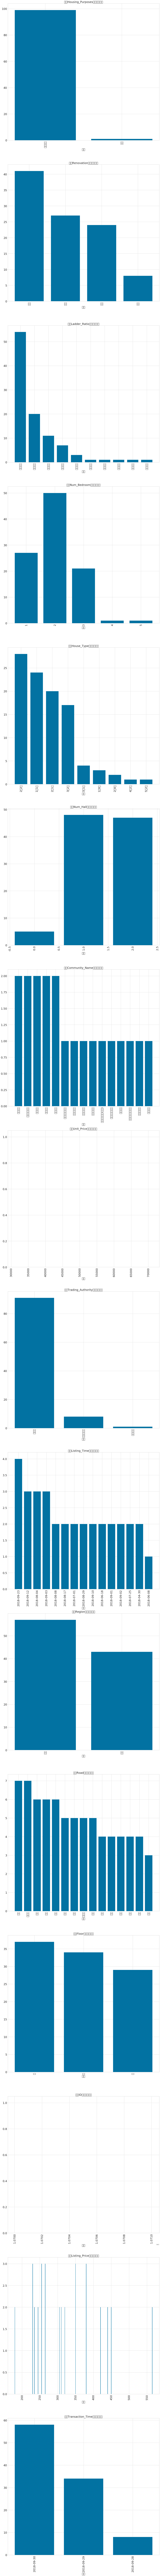

Glyph 30456 missing from current font.
Glyph 20851 missing from current font.
Glyph 24230 missing from current font.
Glyph 31216 missing from current font.
Glyph 31216 missing from current font.
Glyph 30456 missing from current font.
Glyph 20851 missing from current font.
Glyph 24230 missing from current font.


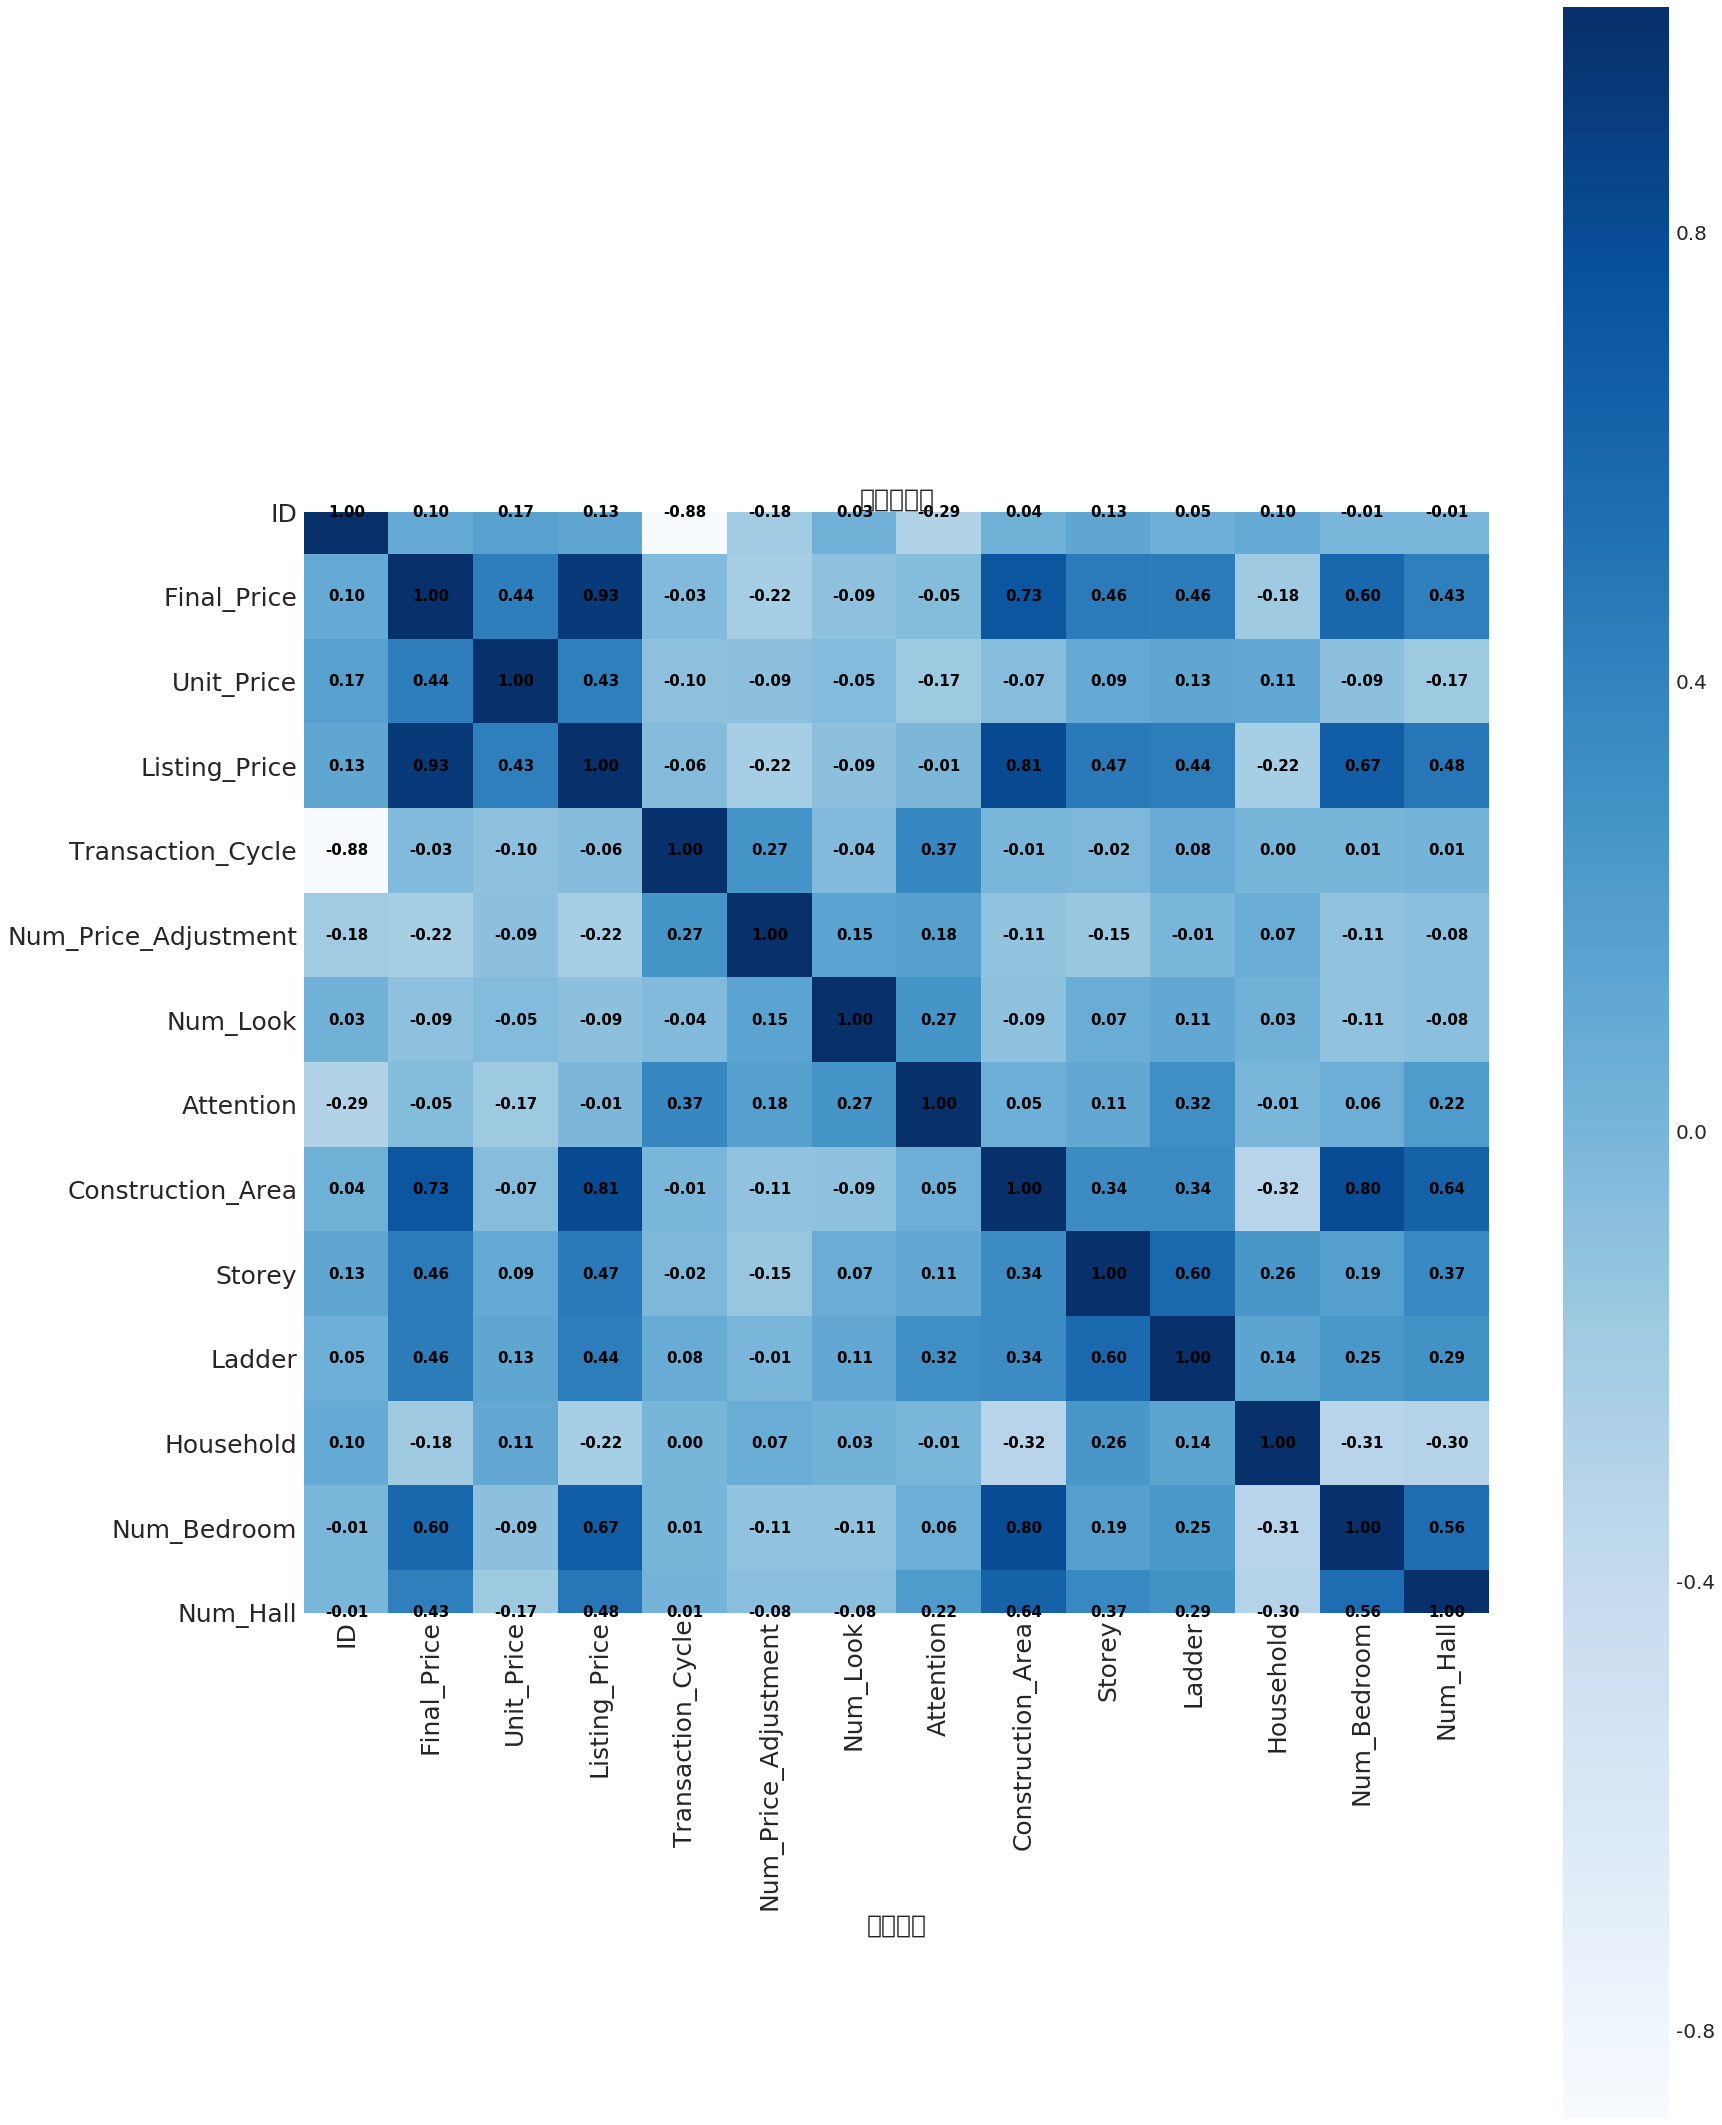

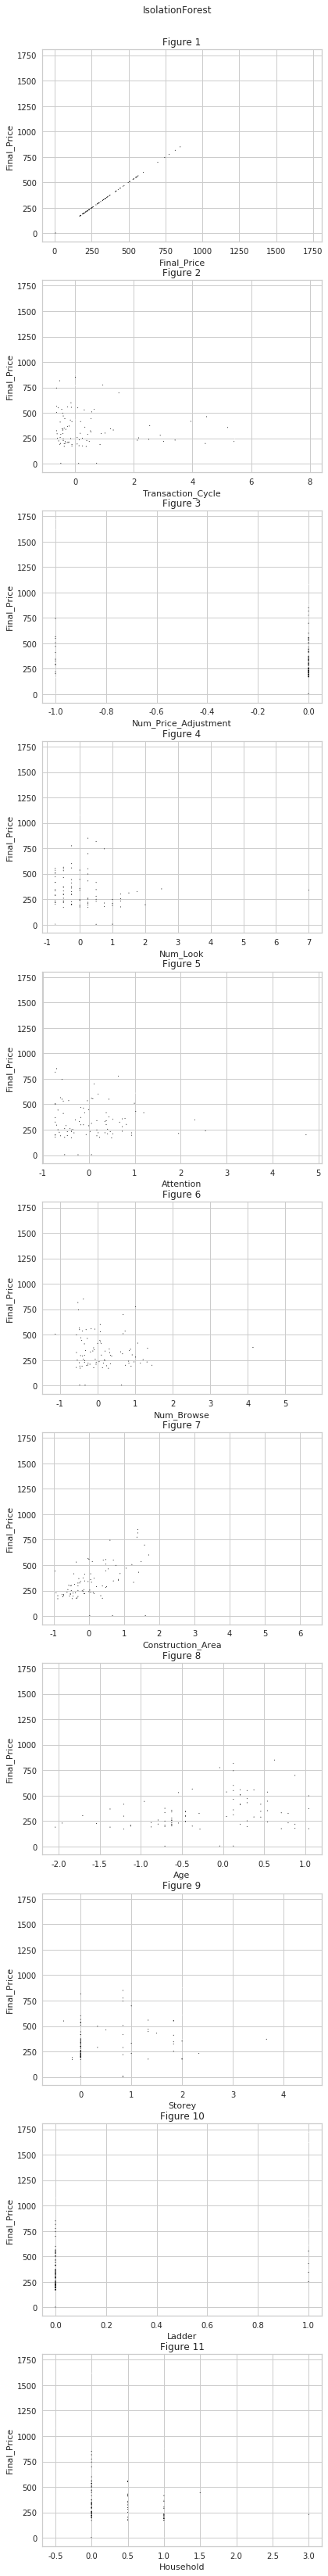

异常检测数： 8
异常检测后数据规格：(100, 12)
耗时：15.6272
异常检测结束


,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Elevator,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,107100261662,浦东,三林,城林雅苑,1室1厅,2018-09-30,218.0,46502,235,0.857895,...,有,动迁安置房,2018-05-05,普通住宅,非共有,3.666667,0.0,2.0,1,1
1,107100566972,浦东,世博,雪野二村,2室1厅,2018-09-30,368.0,62089,380,-0.257895,...,无,商品房,2018-08-19,普通住宅,非共有,0.000000,0.0,1.0,2,1
2,107100382965,浦东,康桥,双秀西园,2室2厅,2018-09-30,289.0,36125,310,0.426316,...,有,动迁安置房,2018-06-15,普通住宅,共有,0.833333,0.0,1.0,2,2
3,107100407723,浦东,康桥,沔溪苑,3室2厅,2018-09-30,360.0,33963,370,0.331579,...,无,商品房,2018-06-24,普通住宅,共有,0.000000,0.0,0.5,3,2
4,107100238140,浦东,金桥,金燕家苑,3室2厅,2018-09-30,775.0,60125,838,0.942105,...,有,商品房,2018-04-27,普通住宅,共有,0.833333,0.0,0.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,107100656562,闵行,古美,南方新村,1室1厅,2018-09-28,250.0,49702,276,-0.605263,...,无,商品房,2018-09-19,普通住宅,非共有,0.000000,0.0,0.0,1,1
88,107002207043,闵行,颛桥,兴银花园,2室1厅,2018-09-28,220.0,33228,240,3.015789,...,无,商品房,2017-10-10,普通住宅,共有,0.000000,0.0,0.0,2,1
89,107100544415,闵行,老闵行,万科公园大道,2室2厅,2018-09-28,371.0,47989,360,-0.205263,...,有,商品房,2018-08-12,普通住宅,非共有,3.666667,0.0,0.0,2,2
90,107100488853,闵行,七宝,万科城花新园,3室2厅,2018-09-28,850.0,65521,850,0.005263,...,有,商品房,2018-07-23,普通住宅,共有,0.833333,0.0,0.0,3,2


In [5]:
input_path =  '../../../Data/Price_System/Price_Predict/intermediate/used_house_data_test_intermediate.csv'
output_path = '../../../Data/Price_System/Price_Predict/qualified/used_house_data_test_qualified.csv'
docs_path = '../../../docs/Price_System/Price_Predict/'
data_qualified = predict_qualified(input_path=input_path, 
                                   output_path=output_path,
                                   docs_path=docs_path,
                                   name_of_target='Final_Price', cols=cols)
data_qualified

In [6]:
input_path='../../../Data/Price_System/Price_Predict/qualified/used_house_data_test_qualified.csv'
output_path='../../../Data/Price_System/Price_Predict/encoding/used_house_data_test_encoding.csv'
data_encoding = predict_encoding(input_path=input_path,
                                 output_path=output_path,
                                 cols=cols,
                                 name_of_target='Final_Price',
                                 type_of_encoding='target')
data_encoding

数据编码开始
编码后数据规格：(92, 33)
耗时：0.1041
数据编码结束


,ID,Region,Road,Community_Name,House_Type,Transaction_Time,Final_Price,Unit_Price,Listing_Price,Transaction_Cycle,...,Elevator,Trading_Authority,Listing_Time,Housing_Purposes,House_Ownership,Storey,Ladder,Household,Num_Bedroom,Num_Hall
0,333.603784,331.362895,333.867126,333.603784,326.625738,334.432689,218.0,333.603784,333.260726,0.857895,...,340.773311,331.742660,333.603784,333.98913,328.944171,3.666667,0.0,2.0,326.421221,322.642929
1,334.102123,331.362895,333.736850,334.102123,330.405435,334.432689,368.0,334.102123,334.312670,-0.257895,...,327.732609,336.223862,334.102123,333.98913,328.944171,0.000000,0.0,1.0,333.525258,322.642929
2,333.839665,331.362895,335.162546,333.839665,337.597960,334.432689,289.0,333.839665,333.727613,0.426316,...,340.773311,331.742660,333.839665,333.98913,339.005012,0.833333,0.0,1.0,333.525258,346.438758
3,334.075545,331.362895,335.162546,334.075545,343.675362,334.432689,360.0,334.075545,334.075545,0.331579,...,327.732609,336.223862,334.075545,333.98913,339.005012,0.000000,0.0,0.5,342.249966,346.438758
4,335.454283,331.362895,334.940128,335.454283,343.675362,334.432689,775.0,335.454283,335.454283,0.942105,...,340.773311,336.223862,335.454283,333.98913,339.005012,0.833333,0.0,0.0,342.249966,346.438758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,333.710097,336.708056,334.143879,333.710097,326.625738,336.435632,250.0,333.710097,333.710097,-0.605263,...,327.732609,336.223862,333.710097,333.98913,328.944171,0.000000,0.0,0.0,326.421221,322.642929
88,333.610429,336.708056,333.466024,333.610429,330.405435,336.435632,220.0,333.610429,333.610429,3.015789,...,327.732609,336.223862,333.610429,333.98913,339.005012,0.000000,0.0,0.0,333.525258,322.642929
89,334.112090,336.708056,332.868857,334.112090,337.597960,336.435632,371.0,334.112090,334.112090,-0.205263,...,340.773311,336.223862,334.112090,333.98913,328.944171,3.666667,0.0,0.0,333.525258,346.438758
90,335.703452,336.708056,335.299469,335.703452,343.675362,336.435632,850.0,335.703452,335.703452,0.005263,...,340.773311,336.223862,335.703452,333.98913,339.005012,0.833333,0.0,0.0,342.249966,346.438758


In [7]:
input_path='../../../Data/Price_System/Price_Predict/encoding/used_house_data_test_encoding.csv'
output_path='../../../Data/Price_System/Price_Predict/feature/used_house_data_test_feature.csv'
data_feature = predict_feature(input_path=input_path,
                               output_path=output_path,
                               num_of_feature=15, name_of_target='Final_Price')
data_feature

,ID,Road,Community_Name,House_Type,Final_Price,Unit_Price,Listing_Price,Floor,Construction_Area,Oriented,Age,Renovation,Construction_struct,Ladder_Ratio,Elevator,Listing_Time
0,333.603784,333.867126,333.603784,326.625738,218.0,333.603784,333.260726,331.420901,-0.598802,330.157764,0.875000,332.732329,342.045227,333.603784,340.773311,333.603784
1,334.102123,333.736850,334.102123,330.405435,368.0,334.102123,334.312670,333.679937,-0.287425,330.157764,-1.375000,340.037690,325.839358,327.296060,327.732609,334.102123
2,333.839665,335.162546,333.839665,337.597960,289.0,333.839665,333.727613,336.901644,0.215569,330.157764,0.458333,332.732329,342.045227,327.296060,340.773311,333.839665
3,334.075545,335.162546,334.075545,343.675362,360.0,334.075545,334.075545,336.901644,0.838323,330.157764,0.125000,332.732329,342.045227,334.240319,327.732609,334.075545
4,335.454283,334.940128,335.454283,343.675362,775.0,335.454283,335.454283,336.901644,1.365269,330.157764,-0.041667,331.030340,342.045227,338.217391,340.773311,335.454283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,333.710097,334.143879,333.710097,326.625738,250.0,333.710097,333.710097,331.420901,-0.502994,330.157764,-0.708333,331.030340,325.839358,338.217391,327.732609,333.710097
88,333.610429,333.466024,333.610429,330.405435,220.0,333.610429,333.610429,333.679937,-0.119760,330.157764,-0.625000,331.758108,325.839358,338.217391,327.732609,333.610429
89,334.112090,332.868857,334.112090,337.597960,371.0,334.112090,334.112090,336.901644,0.143713,330.157764,1.041667,332.732329,342.045227,338.217391,340.773311,334.112090
90,335.703452,335.299469,335.703452,343.675362,850.0,335.703452,335.703452,333.679937,1.389222,330.157764,0.625000,340.037690,342.045227,338.217391,340.773311,335.703452


In [8]:
input_path = '../../../Data/Price_System/Price_Predict/feature/used_house_data_test_feature.csv'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_xgboost.pkl'
train, test_result, train_X, test_X, test_y =  predict_model(input_path=input_path,
                                                             model_path = model_path,                                                             
                                                             name_of_model='xgboost',
                                                             name_of_target='Final_Price')
train

XGBRegressor(alpha=0, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             lambda_=1, learning_rate=0.300000012, max_bin=256,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             refresh_leaf=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             sketch_eps=0.03, ...)

In [9]:
train_X.to_csv('../../../output/Price_System/Price_Predict/model/train_X.csv')
train_X

,ID,Road,Community_Name,House_Type,Unit_Price,Listing_Price,Floor,Construction_Area,Oriented,Age,Renovation,Construction_struct,Ladder_Ratio,Elevator,Listing_Time
0,333.603784,333.867126,333.603784,326.625738,333.603784,333.260726,331.420901,-0.598802,330.157764,0.875000,332.732329,342.045227,333.603784,340.773311,333.603784
1,334.102123,333.736850,334.102123,330.405435,334.102123,334.312670,333.679937,-0.287425,330.157764,-1.375000,340.037690,325.839358,327.296060,327.732609,334.102123
2,333.839665,335.162546,333.839665,337.597960,333.839665,333.727613,336.901644,0.215569,330.157764,0.458333,332.732329,342.045227,327.296060,340.773311,333.839665
3,334.075545,335.162546,334.075545,343.675362,334.075545,334.075545,336.901644,0.838323,330.157764,0.125000,332.732329,342.045227,334.240319,327.732609,334.075545
4,335.454283,334.940128,335.454283,343.675362,335.454283,335.454283,336.901644,1.365269,330.157764,-0.041667,331.030340,342.045227,338.217391,340.773311,335.454283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,334.656941,332.868857,334.656941,343.675362,334.656941,334.656941,333.679937,1.485030,337.995866,0.541667,331.030340,342.045227,338.217391,327.732609,334.656941
70,333.447638,332.868857,333.447638,330.405435,333.447638,333.447638,333.679937,-0.479042,330.157764,-1.208333,340.037690,325.839358,338.217391,327.732609,333.447638
71,334.125379,334.143879,334.125379,330.405435,334.125379,334.312670,336.901644,-0.167665,330.157764,-0.708333,340.037690,325.839358,338.217391,327.732609,334.125379
72,333.859598,333.859598,333.859598,337.597960,333.859598,333.714368,333.679937,0.383234,330.157764,0.041667,331.030340,342.045227,338.217391,327.732609,333.859598


In [10]:
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_xgboost.pkl'
data_path = '../../../Data/Price_System/Price_Predict/feature/used_house_data_test_feature.csv'
result = predict_prediction(model_path=model_path,
                            data_path=data_path,
                            name_of_target='Final_Price')
result

array([218.00037  , 368.0001   , 289.00052  , 359.9993   , 774.99994  ,
       219.00261  , 331.00012  , 409.9998   , 311.9999   , 194.9994   ,
       239.99966  , 505.99966  , 470.00046  , 189.99933  , 356.99933  ,
       463.00272  , 177.99973  , 202.00058  , 509.99997  , 302.0004   ,
       212.9989   , 324.00195  , 232.99908  , 209.99963  , 260.00018  ,
       297.99957  ,   4.0001593, 251.99869  , 564.9994   , 225.00146  ,
       331.99826  , 239.99971  , 352.00024  , 234.99997  , 415.00064  ,
       498.00043  , 745.00055  , 299.99707  , 229.99939  , 175.00032  ,
       529.99927  , 163.99988  , 219.9992   , 345.00256  , 260.00165  ,
       255.00133  ,   4.999845 , 169.99992  , 444.99734  , 415.00107  ,
       190.0007   , 442.99966  ,   5.000321 , 815.9987   , 554.9998   ,
       218.99817  , 200.00235  , 599.99994  , 697.99963  , 232.00012  ,
       340.00012  , 210.00005  , 279.99982  , 196.99947  , 247.99887  ,
       769.99976  , 324.99902  , 536.00134  , 199.99982  , 534.9

In [11]:
name_of_model = 'xgboost'
model_path = '../../../output/Price_System/Price_Predict/model/price_predict_xgboost.pkl'
data_path = '../../../output/Price_System/Price_Predict/model/train_X.csv'
output_path = '../../../output/Price_System/Price_Predict/analysis/shap.png'
predict_analysis(model_path=model_path,
                 name_of_model=name_of_model,
                 data_path=data_path,
                 output_path=output_path)

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580